## 1. Introduction

With growing demands in the market, a Superstore Giant likes to have a better understanding of what factors matter to the sales and improve the forthcoming sales strategy. 

The project is using data ['Superstore.csv'](Https://www.kaggle.com/datasets/vivek468/superstore-dataset-final) from Kaggle containing information related to sales, profits, and other facts about a giant Superstore between Jan. 2014 and Jan. 2018 across 48 states in the US.
***

### Objective

In this project, we challenge ourselves: can we predict the profit in one of the states using the Superstore’s sales data?  

The aim is to analyze historical data and build a model to accurately predict the profit of the superstore. 
More importantly, we want to explore which is the most important factor driving the growth of the profit. 

 - To clean, organize and analyze the data,  and make sure it's well defined
 - To identify the relationships between feature
 - Train different models on the data
 - To assess the model performance and select the best model
 ***
 
### Data
a. Orders
 - Row ID => Unique ID for each row.
 - Order ID => Unique Order ID for each Customer.
 - Order Date => Order Date of the product.
 - Ship Date => Shipping Date of the Product.
 - Ship Mode=> Shipping Mode specified by the Customer.
 - Customer ID => Unique ID to identify each Customer.
 - Customer Name => Name of the Customer.
 - Segment => The segment where the Customer belongs.
 - Country => Country of residence of the Customer.
 - City => City of residence of of the Customer.
 - State => State of residence of the Customer.
 - Postal Code => Postal Code of every Customer.
 - Region => Region where the Customer belong.

b. Products
 - Product ID => Unique ID of the Product.
 - Category => Category of the product ordered.
 - Sub-Category => Sub-Category of the product ordered.
 - Product Name => Name of the Product
 - Sales => Sales of the Product.
 - Quantity => Quantity of the Product.
 - Discount => Discount provided.
 - Profit => Profit/Loss incurred.

## 2. Sourcing and Loading the Data

### 2.1 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import datetime as dt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update(plt.rcParamsDefault)
sns.set()

### 2.2 Load the data

In [2]:
# read data
df = pd.read_csv('Data/Superstore.csv', encoding='ISO-8859-1')
# check the first few rows of data
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [3]:
print("The dataset contains: {} customers and {} features.".format(df.shape[0], df.shape[1]))
df.info()

The dataset contains: 9994 customers and 21 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17

## 3. Data Cleaning 

### 3.1 Check null/missing values

In [4]:
df.isnull().sum()
# - Data is very clean and no missing value is observed.

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Ship mode
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [6]:
# Segment
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [7]:
# df['City'].value_counts()
df['City'].nunique()

531

In [8]:
# Region
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [9]:
# Category
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [10]:
# Sub-Category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [11]:
df['Sub-Category'].nunique()

17

In [12]:
# unique customers - 793
df['Customer ID'].nunique()

793

In [13]:
df['Postal Code'].nunique()

631

In [14]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [15]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)

In [16]:
state_df.columns = ['State Code','State']
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)

In [17]:
sales.reset_index(level=0, inplace=True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [18]:
sales.head()

State State Code    Row ID  Postal Code        Sales  Quantity  \
0     Alabama         AL    243876      2195669   19510.6400       256   
1     Arizona         AZ   1019876     19102126   35282.0010       862   
2    Arkansas         AR    304575      4339309   11678.1300       240   
3  California         CA  10137449    184382639  457687.6315      7667   
4    Colorado         CO    797002     14613828   32108.1180       693   

   Discount      Profit  
0       0.0   5786.8253  
1      68.0  -3427.9246  
2       0.0   4008.6871  
3     145.6  76381.3871  
4      57.6  -6527.8579

In [19]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout( title_text = 'Sales',  geo_scope='usa') # limite map scope to USA

fig.show();

 ### 3.2 check outliers

In [20]:
from sklearn.ensemble import IsolationForest

def detect_outliers(dataframe,contamination):
    
    cols = list(df.select_dtypes(['int64']).columns)+list(df.select_dtypes(['float64']).columns)
    model=IsolationForest(contamination=contamination)
    model.fit(df[cols])
    outliers = model.predict(dataframe[cols]) ==-1
    return outliers

In [21]:
# finding outliers considering 0.5% of contamination
contamination=0.005
index=detect_outliers(df,contamination)
row,col=df[index].shape
print("number of outliers: {}".format(row))

number of outliers: 50


In [22]:
# remove 50 outliers
df=df[index==False]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9944 non-null   int64  
 1   Order ID       9944 non-null   object 
 2   Order Date     9944 non-null   object 
 3   Ship Date      9944 non-null   object 
 4   Ship Mode      9944 non-null   object 
 5   Customer ID    9944 non-null   object 
 6   Customer Name  9944 non-null   object 
 7   Segment        9944 non-null   object 
 8   Country        9944 non-null   object 
 9   City           9944 non-null   object 
 10  State          9944 non-null   object 
 11  Postal Code    9944 non-null   int64  
 12  Region         9944 non-null   object 
 13  Product ID     9944 non-null   object 
 14  Category       9944 non-null   object 
 15  Sub-Category   9944 non-null   object 
 16  Product Name   9944 non-null   object 
 17  Sales          9944 non-null   float64
 18  Quantity

### 3.3 Drop undesired columns

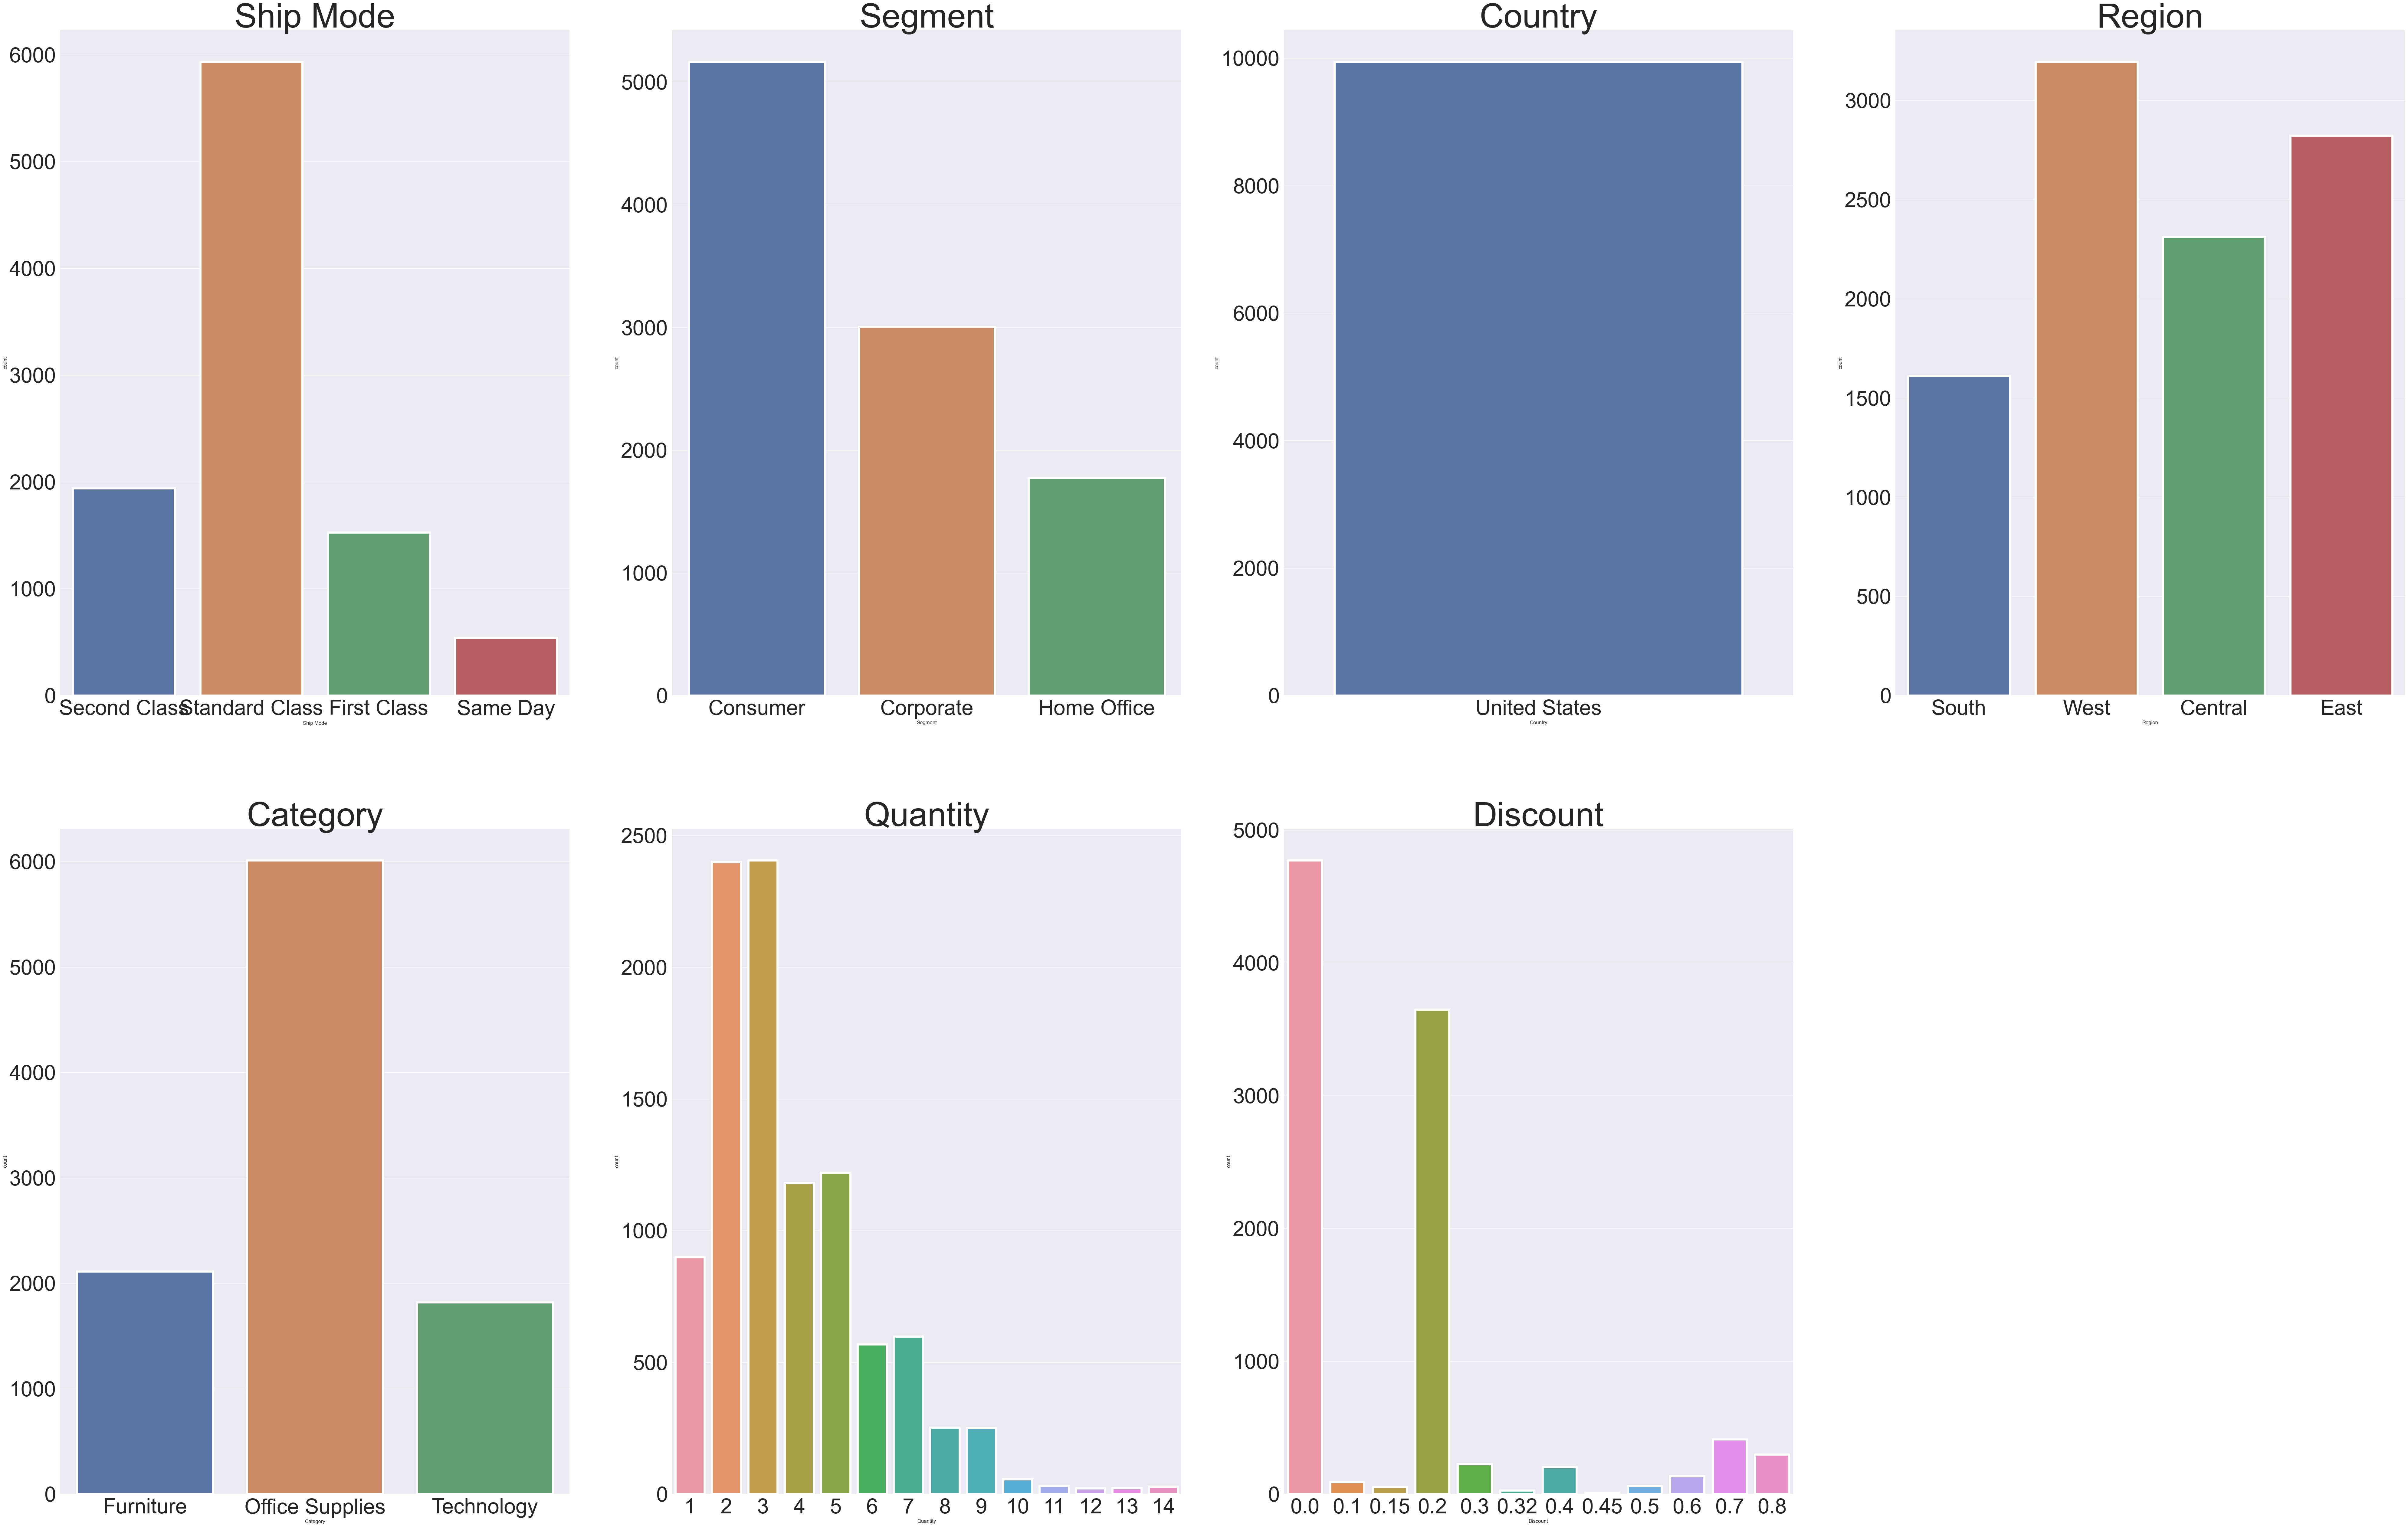

In [24]:
from math import ceil

def countplots(df,max_columns,val,figsize,title_size=20, title=""):
    leh=len(df.columns)
    rows=ceil(leh/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1
     
    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(rows,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks 
            plt.xticks(size=50)
            
    plt.show();
    
countplots(df,4,15,(100,200),80)    

In [25]:
# the dataset is only located in the US
# confirm with pandas .nunique
df['Country'].nunique()

1

In [26]:
# state - 49
df['State'].nunique()

49

In [27]:
# city -531
df['City'].nunique()

531

In [28]:
To_Drop = ['Row ID', 'Customer Name', 'Product ID', 'Country']
df.drop(columns=To_Drop, axis=1, inplace=True)

 - 'Row ID','Customer Name', and 'Product ID' were dropped because they don't provide much predictive power in this case.
 - 'Country' was dropped, as all the instances occur in the United States.
 - 'Postal Code' was dropped.

### 3.4 Convert 'Order Date' and 'Ship Date' to 'datetime' objects instead of objects

In [29]:
df = df.rename(columns={'Ship Mode': 'ShipMode'})

In [30]:
df['Order Date'].unique()
# our sales data spans all the way from 01-03-2014 to 12-30-2017

array(['11/8/2016', '6/12/2016', '10/11/2015', ..., '6/3/2016',
       '4/12/2015', '1/21/2014'], dtype=object)

In [31]:
df['Order Date'].min()

'1/1/2017'

In [32]:
df['Order Date'].max()

'9/9/2017'

In [33]:
# reformat and convert 'object' to 'datetime' 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [34]:
#df['Waiting_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Months'] = df['Order Date'].dt.month
# df['Months'] = df.Months.astype('object')

## 4. EDA

### 4.1  Univariate analysis
Explore each variable, study characteristics of each variable, and there is no reference to causes or relationships.

Univariate non-graphical: Central tendency, Deviation, Skewness, kurtosis, etc.

Univariate graphical: Histogram, Box Plots, Pie Charts, Density Plot, etc.

#### ANOVA test

ANOVA is used to estimate how the mean of a quantitative variable changes according to the levels of categorical variables. Use a ANOVA when you want to know how independent variables, in combination, affect a dependent variable.

F-statistic: Variation between sample means / Variation within samples; the larger the F-statistic, the greater the evidence that there is a difference between the group means.

In [35]:
#check the effect of categorical variable on our target variable 'profit'
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

cols=['ShipMode', 'Segment','Region','Category','Quantity','Discount']

for item in cols:
    model=ols('Sales ~ {}'.format(item),data=df).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    print(anova_result)
    print()

                sum_sq      df         F    PR(>F)
ShipMode  1.065331e+06     3.0  2.186678  0.087395
Residual  1.614229e+09  9940.0       NaN       NaN

                sum_sq      df         F    PR(>F)
Segment   3.073893e+05     2.0  0.946063  0.388302
Residual  1.614987e+09  9941.0       NaN       NaN

                sum_sq      df         F    PR(>F)
Region    1.000232e+06     3.0  2.052973  0.104202
Residual  1.614294e+09  9940.0       NaN       NaN

                sum_sq      df           F         PR(>F)
Category  1.343711e+08     2.0  450.996743  3.289264e-188
Residual  1.480923e+09  9941.0         NaN            NaN

                sum_sq      df           F         PR(>F)
Quantity  9.542155e+07     1.0  624.184625  1.152153e-133
Residual  1.519873e+09  9942.0         NaN            NaN

                sum_sq      df          F    PR(>F)
Discount  3.616218e+06     1.0  22.307457  0.000002
Residual  1.611678e+09  9942.0        NaN       NaN



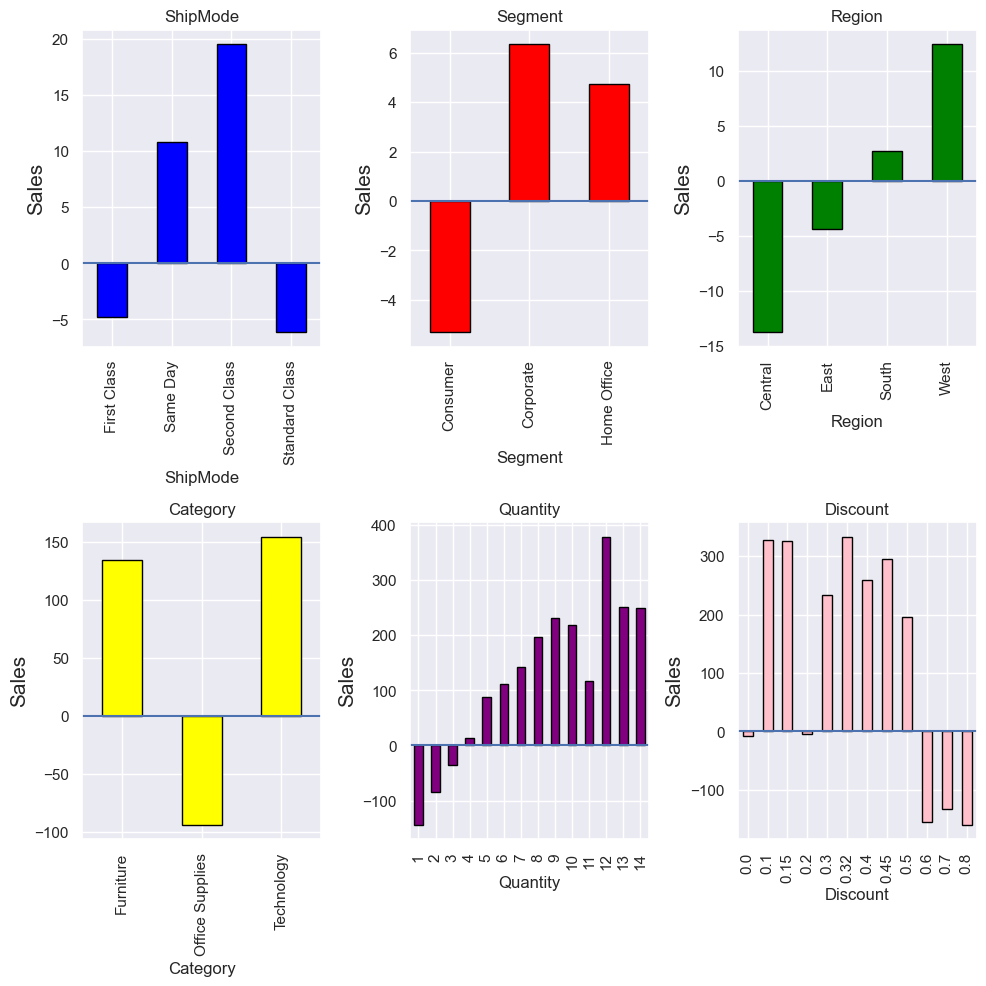

In [36]:
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    mot=df[target].mean()
    fig=plt.figure(figsize=size)
    leh=len(cols)
    rows=ceil(leh/maxcol)
    i=1
    for item in cols:
        plt.subplot(rows,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].mean()-mot).plot(kind='bar',color=palette[i-1],edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    fig.tight_layout(pad=1.0)
    plt.savefig('images/anovaPprice.png')
    plt.show();

mean_dev(df,'Sales',3,['ShipMode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(10,10))

Based on 'sales' mean deviations, an ANOVA testing F-values show:

 - 'Quantity' (F=601): the sales increases with the number of products from 1-8 and then no much increase.
 
 - 'Category':  'Technology' products generated high sales.
 
 - 'Discount' (F=430): the largest sales is generated with 15-50% discount; the worst sales are in the range of discount > 50%.
  
 - 'Region':  'West' Region had more sales.
  
 - 'Segment' and 'Ship Mode': have very small F-values  

#### remove outliers of Sales

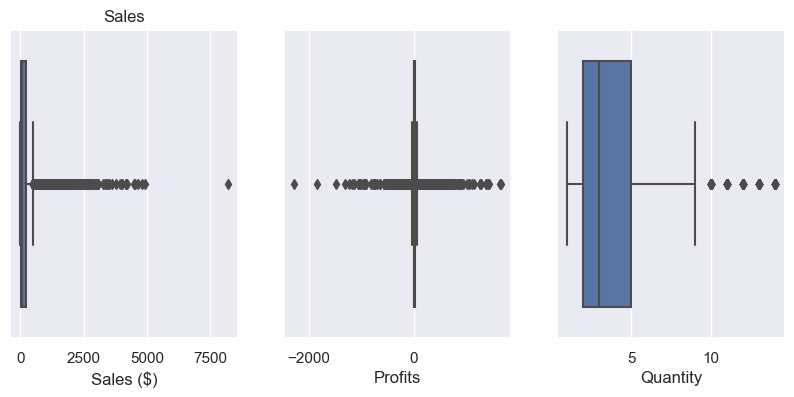

In [37]:
# before the cleaned data
fig, axs = plt.subplots(1,3, figsize=(10,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')

plt.subplot(1,3,2)
sns.boxplot(x=df['Profit'])
plt.xlabel('Profits')

plt.subplot(1,3,3)
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.savefig('images/pie.png')
plt.show();

In [38]:
# remove 'Sales' outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)
IQR = q3 - q1

filter = (df['Sales'] >= q1 -1.5 *IQR) & (df['Sales'] <= q3 + 1.5 *IQR)
df = df.loc[filter]
df.shape

(8809, 18)

In [39]:
df['Sales'].max()

489.23

In [40]:
df.drop(df[df['Sales']>200].index, inplace=True)
df.shape

(7415, 18)

In [41]:
# remove 'Profit' outliers
q1 = df['Profit'].quantile(0.25)
q3 = df['Profit'].quantile(0.75)
IQR = q3 - q1

filter = (df['Profit'] >= q1 -1.5 *IQR) & (df['Profit'] <= q3 + 1.5 *IQR)
df = df.loc[filter]
df.shape

(6404, 18)

In [42]:
# remove 'quantity' outliers
df.drop(df[df['Quantity']>7].index, inplace=True)
df.shape

(6113, 18)

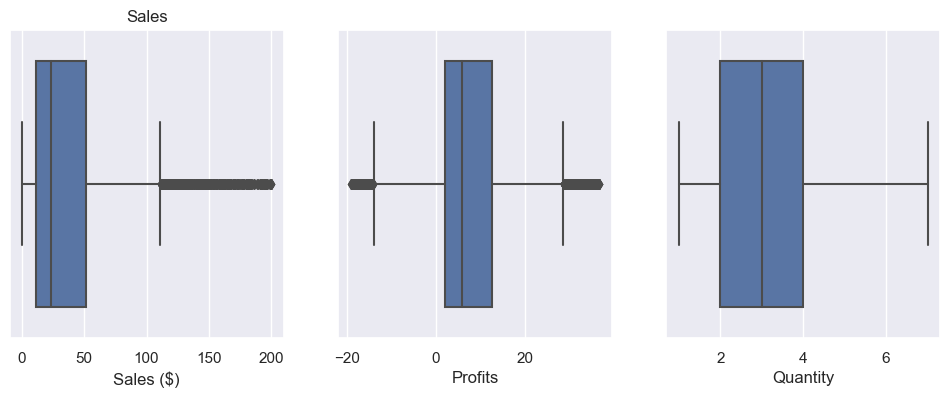

In [43]:
# plot the cleaned data
fig, axs = plt.subplots(1,3,figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['Sales'])
plt.xlabel('Sales ($)')
plt.title('Sales')

plt.subplot(1,3,2)
sns.boxplot(x=df['Profit'])
plt.xlabel('Profits')

plt.subplot(1,3,3)
sns.boxplot(x=df['Quantity'])
plt.xlabel('Quantity')
plt.savefig('images/pie.png')
plt.show();

#### Sales/Profit per State

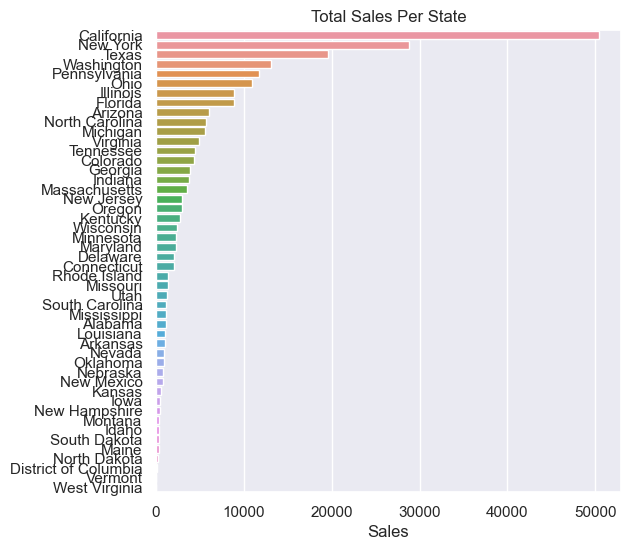

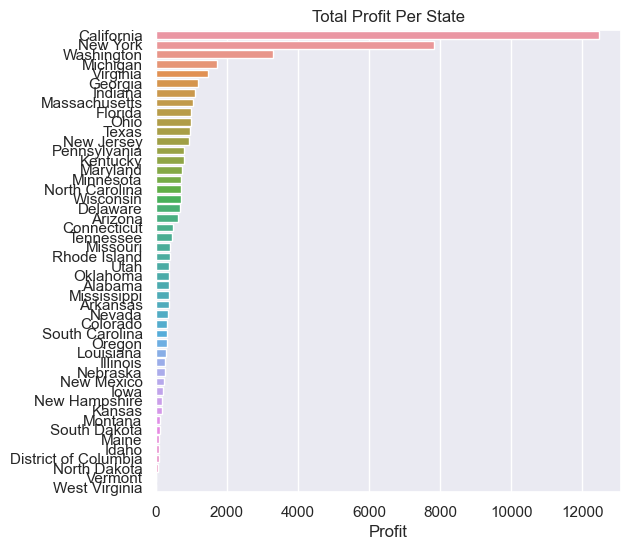

In [44]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,6))
    sum_df = df.groupby(by=['State'])[col].sum()
    sum_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=sum_df.index, x=sum_df, ax=ax)
    ax.set_title(f'Total {col} Per State') 
    ax.set_ylabel('')
    plt.savefig(f'images/sum_state_{col}.png')
    plt.show();

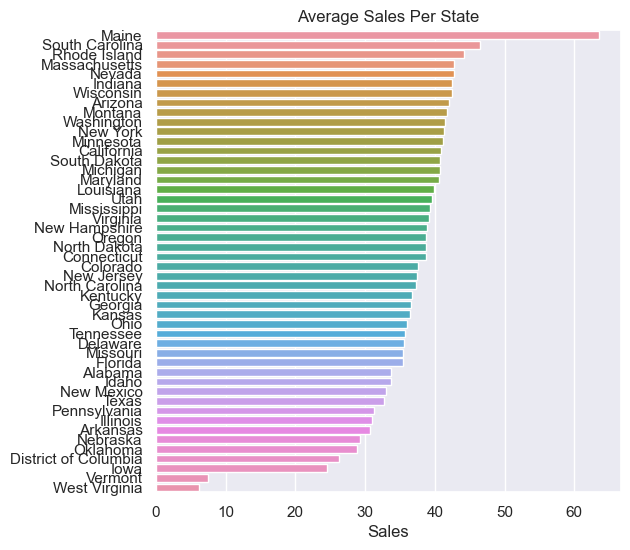

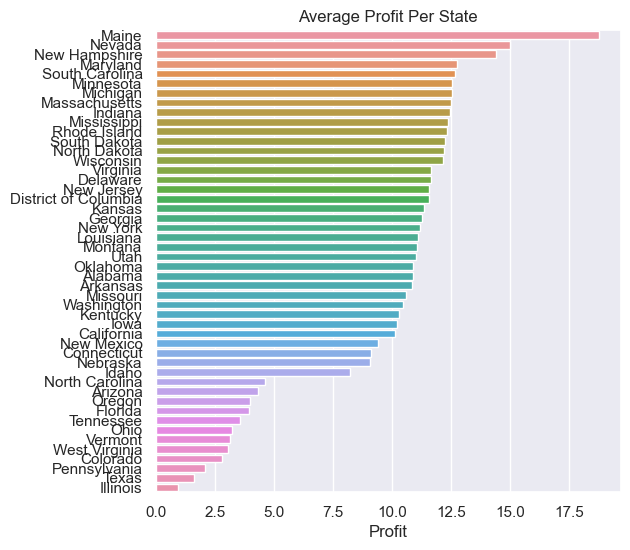

In [45]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,6))
    mean_df = df.groupby(by=['State'])[col].mean()
    mean_df.sort_values(inplace=True,ascending=False)
    sns.barplot(y=mean_df.index, x=mean_df, ax=ax)
    ax.set_title(f'Average {col} Per State') 
    ax.set_ylabel('')
    plt.savefig(f'images/mean_state_{col}.png')
    plt.show();

#### Sales/Profit per Region

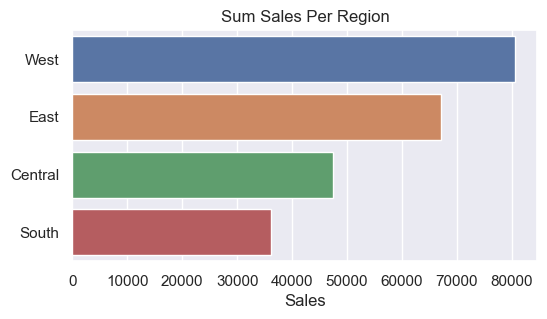

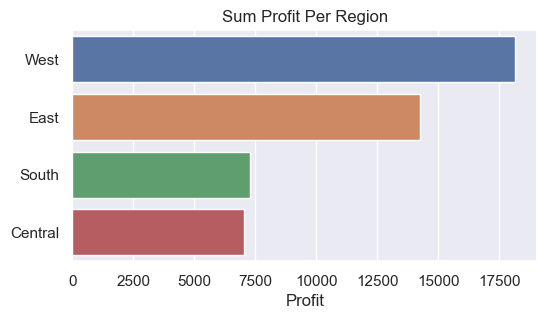

In [46]:
# create a list of columns to be analyszed numerically for all cities
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    fig, ax = plt.subplots(figsize=(6,3))
    sum_df2 = df.groupby(by=['Region'])[col].sum()
    sum_df2.sort_values(inplace=True,ascending=False)
    sns.barplot(y=sum_df2.index, x=sum_df2, ax=ax)
    ax.set_title(f'Sum {col} Per Region') 
    ax.set_ylabel('')
    plt.savefig(f'images/sum_reg_{col}.png')
    plt.show();

#### Sales/Profit per Segment

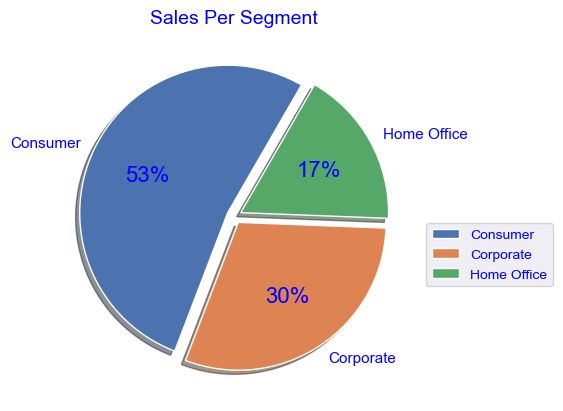

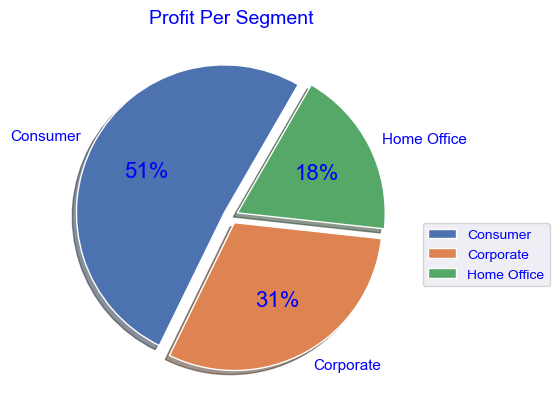

In [47]:
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    segments = list(df.groupby('Segment')[col])
    seg_dict = {}
    for i in range(len(segments)):
        num = sum(segments[i][1])
        seg_dict[str(segments[i][0])] = num
    df_seg = pd.DataFrame.from_dict(seg_dict, orient='index', columns=[col]).reset_index()
    df_seg.columns = ['Segment', col]
    labels = df_seg['Segment']
    values = df_seg[col]
    plt.rcParams['text.color'] = 'blue'
    plt.rcParams['font.size'] = 16
    explode = (0.05, 0.05, 0.05)
    pie = plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.0f%%', startangle=60)
    plt.title(f'{col} Per Segment', fontsize=14) 
    plt.ylabel('')
    plt.legend(pie[0], labels, bbox_to_anchor = (1,0.5), fontsize=10)
    plt.savefig(f'images/sum_seg_{col}.png')
    plt.show();
#labeldistance = 1.3,pctdistance = 1.15

#### Sales/Profit per Category

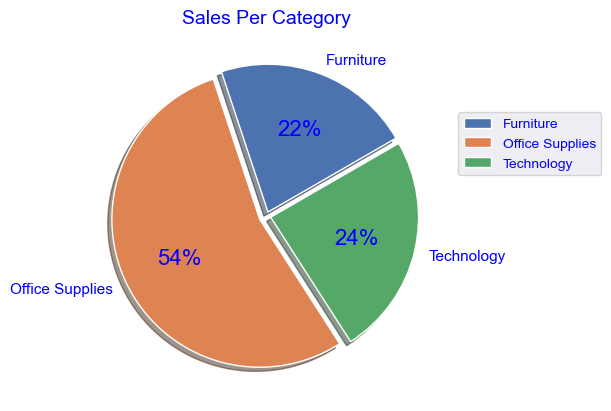

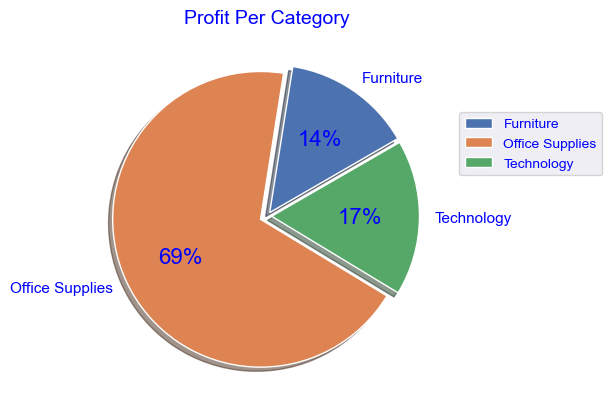

In [48]:
numerical_cols = ['Sales','Profit']

for col in numerical_cols:
    cats = list(df.groupby('Category')[col])
    cat_dict = {}
    for i in range(len(segments)):
        num = sum(cats[i][1])
        cat_dict[str(cats[i][0])] = num
    df_cat = pd.DataFrame.from_dict(cat_dict, orient='index', columns=[col]).reset_index()
    df_cat.columns = ['Category', col]
    labels = df_cat['Category']
    values = df_cat[col]
    plt.rcParams['text.color'] = 'blue'
    plt.rcParams['font.size'] = 16
    explode = (0.03, 0.05, 0.03)
    pie = plt.pie(values, labels=labels, explode=explode, shadow=True, autopct='%1.0f%%', startangle=30)
    plt.title(f'{col} Per Category', fontsize=14) 
    plt.ylabel('')
    plt.legend(pie[0], labels, bbox_to_anchor = (1,0.8), fontsize=10)
    plt.savefig(f'images/sum_cat_{col}.png')
    plt.show();

In [49]:
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") 

Top_subcat.reset_index(inplace=True) 
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True)

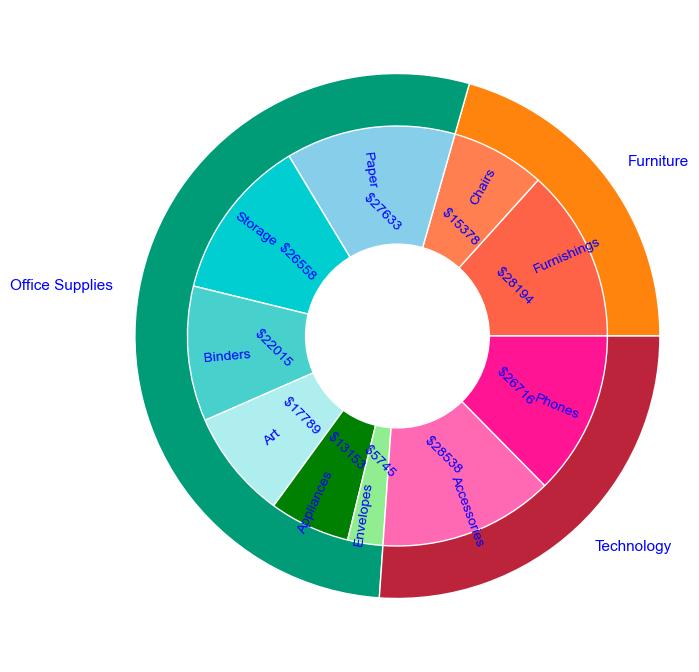

In [50]:
def autopct_format(values): 
    def my_format(pct): 
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

fig, ax = plt.subplots(figsize=(7, 7))
ax.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle

width = 0.2
outer_colors = ['#FE840E','#009B77','#BC243C'] # Outer colors of the pie chart
inner_colors = ['tomato','coral',"skyblue", "darkturquoise","mediumturquoise","paleturquoise","green", "lightgreen","hotpink","deeppink"] # inner colors of the pie chart
pie = ax.pie(Top_subcat_1['Sales'], radius=1, labels=Top_subcat_1['Category'],colors=outer_colors,wedgeprops=dict(edgecolor='w'))
pie2 = ax.pie(Top_subcat['Sales'], radius=1-width, labels=Top_subcat['Sub-Category'],autopct= autopct_format(Top_subcat['Sales']),labeldistance=0.7,colors=inner_colors,wedgeprops=dict(edgecolor='w'), pctdistance=0.6, rotatelabels =True, textprops={'fontsize': 10})

# Rotate fractions
# [0] = wedges, [1] = labels, [2] = fractions
fraction_text_list = pie2[2]
for text in fraction_text_list: 
    text.set_rotation(315) # rotate the autopct values

centre_circle = plt.Circle((0,0),0.35,fc='white') # Draw a circle on the pie chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
plt.tight_layout()
plt.savefig('images/sub_cat.png')
plt.show();

#### Top 10 states in total sales

In [51]:
# 
state_total_sales = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Sales)
    state_total_sales[state] = total

df_state_total_sales = pd.DataFrame.from_dict(state_total_sales, orient='index', columns=['total_sales'])

df_state_total_sales = df_state_total_sales.sort_values(by='total_sales', ascending=False)
#df_state_total_sales.columns = ['State', 'total_sales']
df_state_total_sales.columns = ['total_sales']
df_state_total_sales[:10]

total_sales
California       50376.1400
New York         28854.0180
Texas            19604.4284
Washington       13047.5880
Pennsylvania     11780.3630
Ohio             10912.7320
Illinois          8939.0640
Florida           8861.7630
Arizona           6053.7320
North Carolina    5698.1340

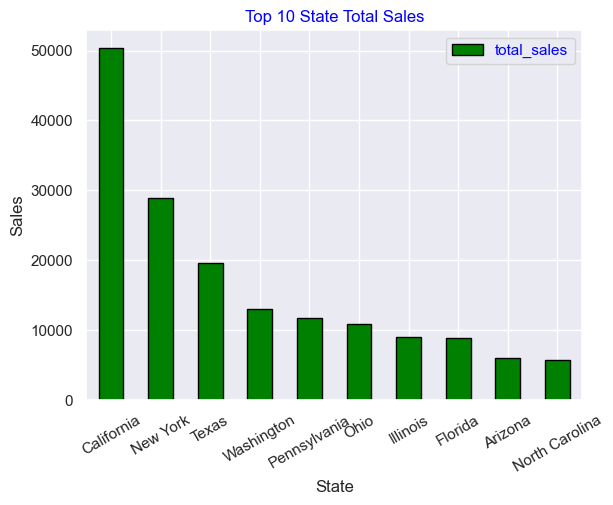

In [52]:
# top 10 states in sales
df_state_total_sales[:10].plot(kind='bar', color='green', edgecolor='Black')
plt.title('Top 10 State Total Sales')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=30)
plt.savefig('images/top10_state1.png')
plt.show();

#### Top 10 states in profits 

In [53]:
state_total_profits = {}
for y in df.groupby('State'):
    state = y[0]
    total = sum(y[1].Profit)
    state_total_profits[state] = total

df_state_total_profits = pd.DataFrame.from_dict(state_total_profits, orient='index', columns=['total_profits'])

df_state_total_profits = df_state_total_profits.sort_values(by='total_profits', ascending=False)
df_state_total_profits.columns = [ 'total_profits']
df_state_total_profits.head(10)

total_profits
California        12464.4558
New York           7829.4663
Washington         3297.1554
Michigan           1728.4753
Virginia           1467.8343
Georgia            1194.0560
Indiana            1096.0021
Massachusetts      1037.0337
Florida             987.1781
Ohio                981.9935

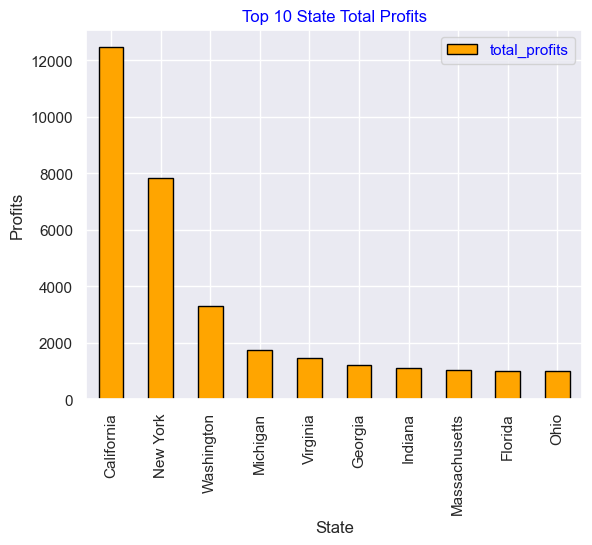

In [54]:
# # top 10 states in profits
df_state_total_profits[:10].plot(kind='bar', color='orange', edgecolor='Black')
plt.title('Top 10 State Total Profits')
plt.xlabel('State')
plt.ylabel('Profits')
plt.savefig('images/top10_state2.png')
plt.show();

# top 1 state: california the most densely populated state

#### Top 10 cities in total sales

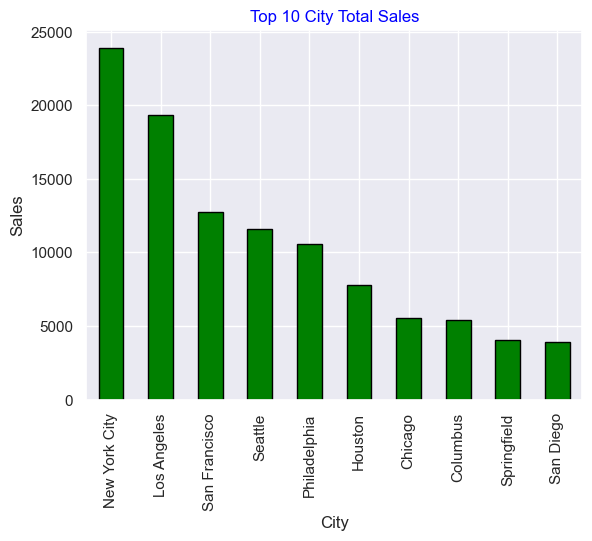

In [55]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='green',edgecolor='Black')
plt.title('Top 10 City Total Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.savefig('images/top10_city1.png')
plt.show();

#### Top 10 cities in total Profit

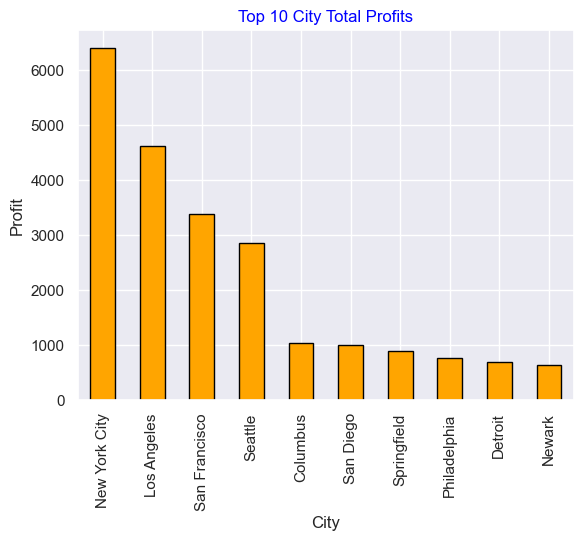

In [56]:
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='orange',edgecolor='Black')
plt.title('Top 10 City Total Profits')
plt.xlabel('City')
plt.ylabel('Profit')
plt.savefig('images/top10_city2.png')
plt.show();

# top 1 city: New york - very densely populated city

#### Profits vs Region

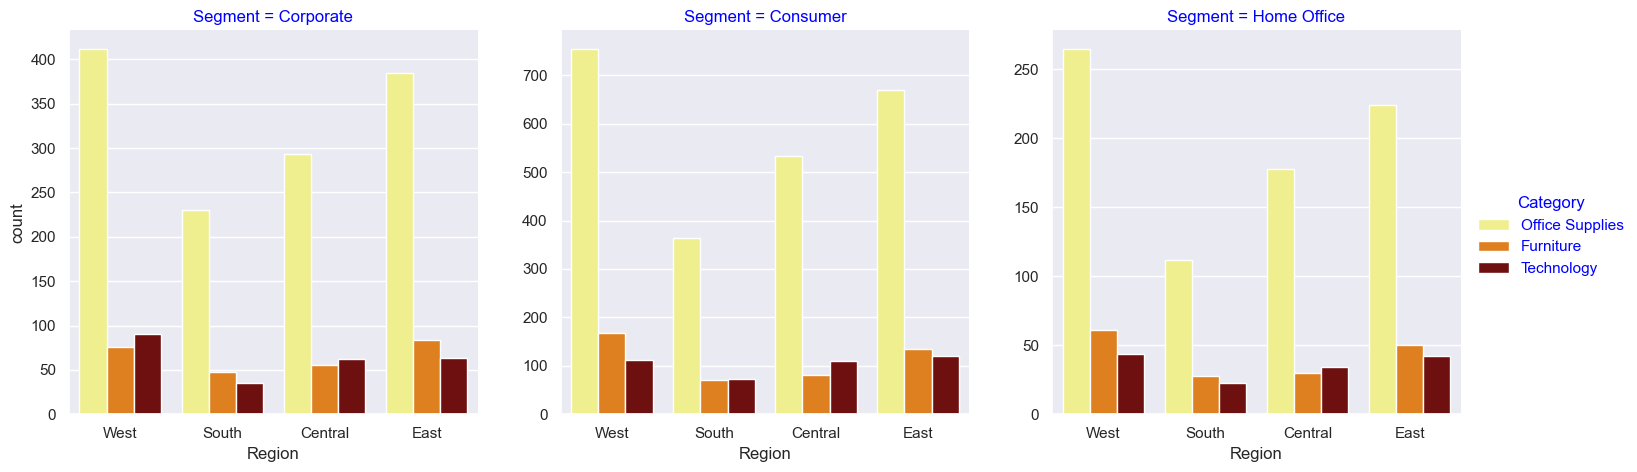

In [57]:
# total profit
sns.catplot(x='Region', hue='Category',  col='Segment', data=df, kind="count", 
                estimator=lambda : len(x) / len(df) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_total.png')
plt.show();

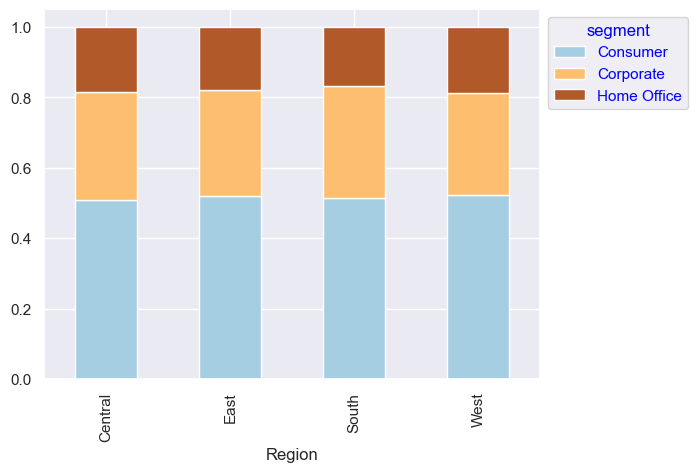

In [58]:
# positive profit
df_pos_profit = df[df['Profit']>0].sort_values('Profit')

by_pos_profit = df_pos_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_pos_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

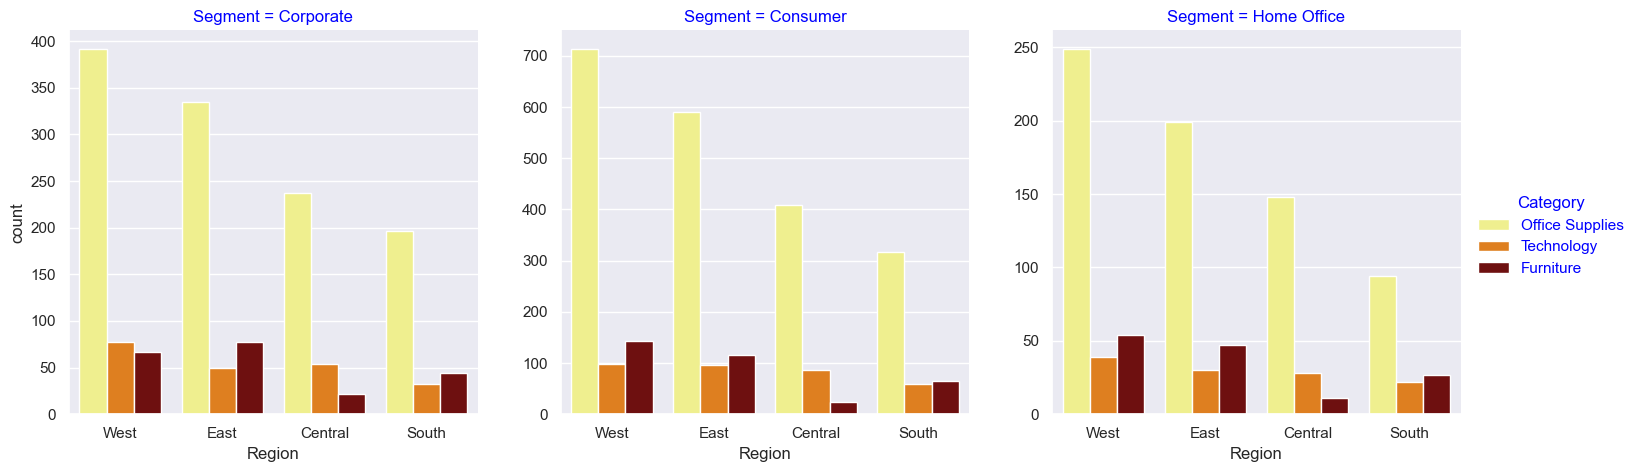

In [59]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_pos_profit, kind="count", 
                estimator=lambda : len(x) / len(df_pos_profit) * 100, sharey=False, palette="afmhot_r")
#plt.savefig('images/profit_pos.png')
plt.show();
# obervation: 'office supplies' has the largest amount of orders across all the region.

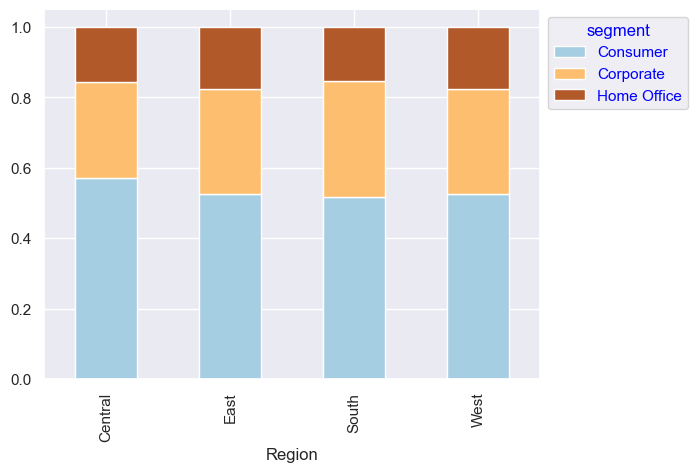

In [60]:
# negative profit
df_neg_profit = df[df['Profit']<0].sort_values('Profit')

by_neg_profit = df_neg_profit.groupby('Region').Segment.value_counts(normalize=True).unstack()
by_neg_profit.plot(kind="bar", stacked=True, cmap="Paired")
plt.legend(title = "segment", bbox_to_anchor= (1, 1))
plt.show();

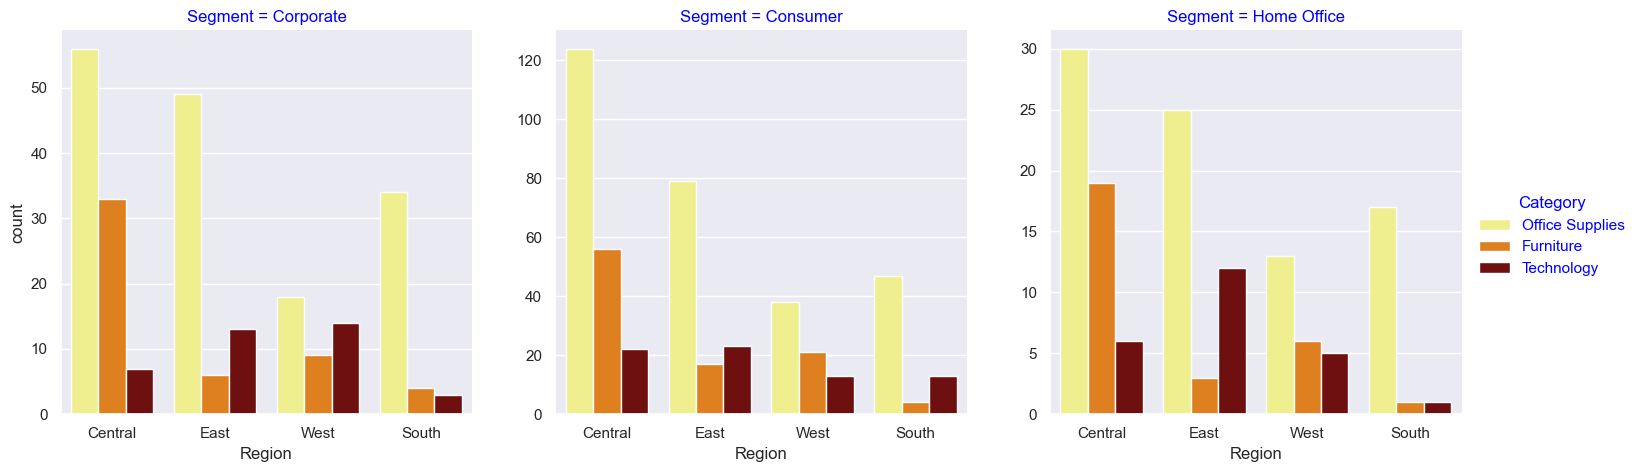

In [61]:
sns.catplot(x='Region', hue='Category',  col='Segment', data=df_neg_profit, kind="count", 
                estimator=lambda : len(x) / len(df_neg_profit) * 100, sharey=False, palette="afmhot_r")
plt.show();
#  Most negative profit came from in the central region. Need to break down this region ...

In [62]:
# break down the Central region
df_Central = df_neg_profit[df_neg_profit['Region'] == 'Central'].groupby('State').Category.value_counts(normalize=True).unstack()
df_Central.head()
# neg profit mainly came from 'Texas' and 'Illinois'

Category  Furniture  Office Supplies  Technology
State                                           
Illinois   0.324786         0.581197    0.094017
Texas      0.296610         0.601695    0.101695

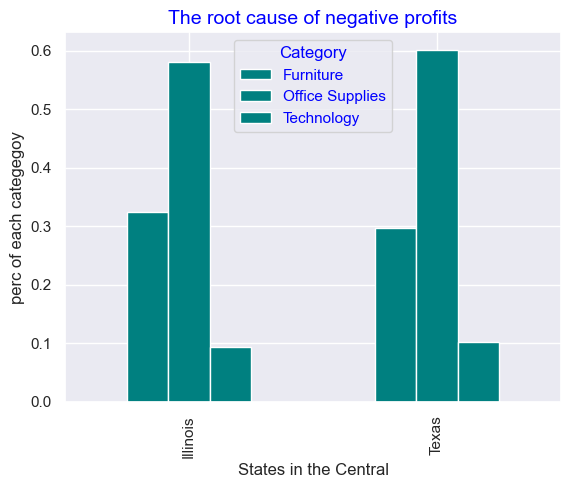

In [63]:
plt.figsize=(6,6)
df_Central.plot(kind='bar', color='teal')
plt.xlabel('States in the Central')
plt.ylabel('perc of each categegoy')
plt.title('The root cause of negative profits', fontsize=14)
plt.savefig('images/profit_2states.png')
plt.show();

 - the number of orders increased from 2014 to 2017.
 - 'Sales' has a skewed, right tailed distribution with a range from 0.44 to 496.86.

### 4.2 Feature Engineering

#### change zip to binary by rank

In [64]:
zipsorted = pd.DataFrame(df.groupby('Postal Code')['Sales'].median().sort_values(ascending=True))
# divide our dataframe into groups with entries per group as specified above, assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df['zip_rank'] = df['Postal Code'].apply(lambda x: make_group(x, zipsorted, 'rank'))
df['median_zip'] = df['Postal Code'].apply(lambda x: round(df.loc[df['Postal Code']==x]['Sales'].median(), 0))

In [65]:
#low_zips = df.loc[df['median_zip']<df['Sales'].mean()]
#high_zips = df.loc[df['median_zip']>=df['Sales'].mean()]

#df.loc[df['median_zip']<df['Sales'].mean(), 'Postal Code'] =1
#df.loc[df['median_zip']>df['Sales'].mean(), 'Postal Code'] = 0
df.drop(['median_zip', 'Postal Code'], axis=1, inplace=True)

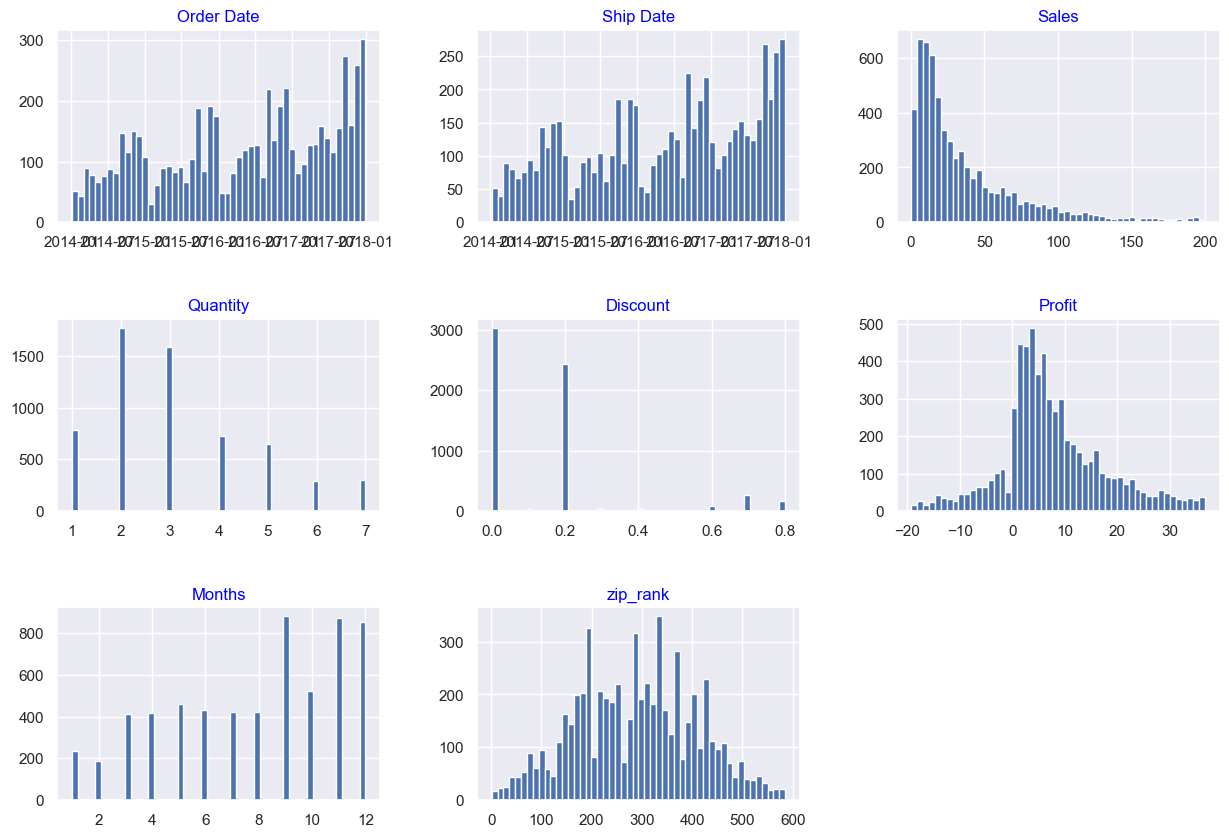

In [66]:
# plot histograms of each of the numeric features
df.hist(figsize=(15,10), bins=50)
plt.subplots_adjust(hspace=0.5)
plt.show();

### 4.3 Categorical features

In [67]:
# Let's select the columns of the train set with numerical data
df_cat = df.select_dtypes(exclude=["float64", "int64", "datetime64[ns]"])
df_cat.head()

Order ID        ShipMode Customer ID    Segment             City  \
2  CA-2016-138688    Second Class    DV-13045  Corporate      Los Angeles   
4  US-2015-108966  Standard Class    SO-20335   Consumer  Fort Lauderdale   
5  CA-2014-115812  Standard Class    BH-11710   Consumer      Los Angeles   
6  CA-2014-115812  Standard Class    BH-11710   Consumer      Los Angeles   
8  CA-2014-115812  Standard Class    BH-11710   Consumer      Los Angeles   

        State Region         Category Sub-Category  \
2  California   West  Office Supplies       Labels   
4     Florida  South  Office Supplies      Storage   
5  California   West        Furniture  Furnishings   
6  California   West  Office Supplies          Art   
8  California   West  Office Supplies      Binders   

                                        Product Name  zip_rank  
2  Self-Adhesive Address Labels for Typewriters b...       283  
4                     Eldon Fold 'N Roll Cart System       263  
5  Eldon Expressions Wood and Plastic Desk Access...       293  
6                                         Newell 322       293  
8  DXL Angle-View Binders with Locking Rings by S...       293

##### bar plots

In [68]:
df_cat.columns

Index(['Order ID', 'ShipMode', 'Customer ID', 'Segment', 'City', 'State',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'zip_rank'],
      dtype='object')

In [69]:
df_cat = df_cat[['ShipMode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Product Name']]

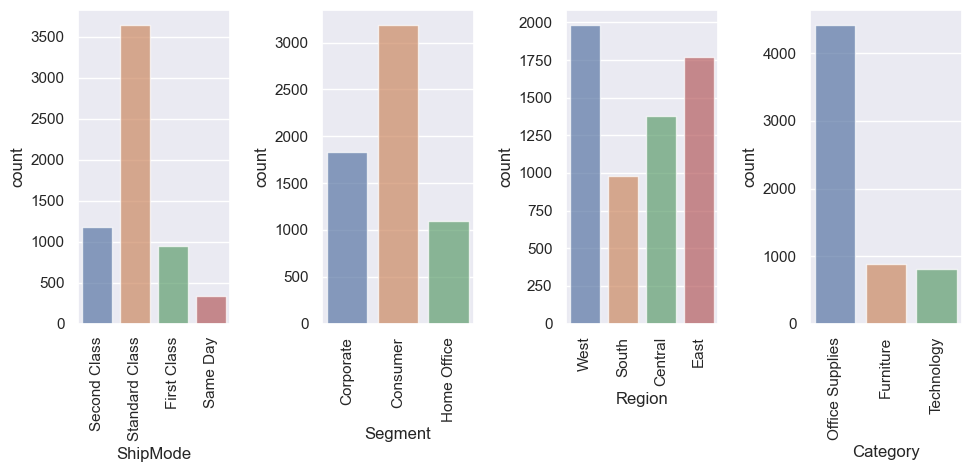

In [70]:
# Countplot for each of the categorical features
fig, axes = plt.subplots(1, 4, figsize=(10, 5))

# plot barplot of each feature
for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)
        
fig.tight_layout()     
plt.show();

**Highlights:**
 
 - Ship mode: standard class is the most often used shipping method
 - Segment: the total orders from consumers is dominant
 - Region: West and East regions have higher amount of sold items 

##### box plots

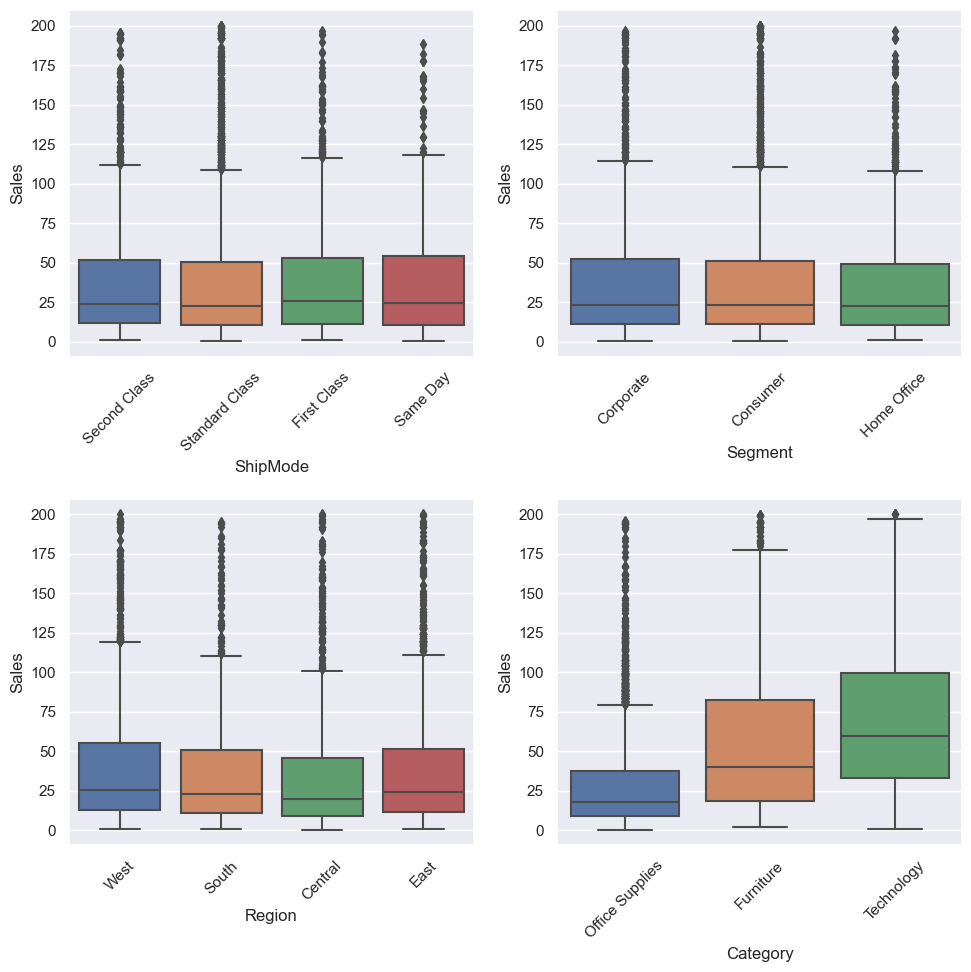

In [71]:
# With the boxplot we can see the variation of the target 'profit' in each of the categorical features
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# plot the variation of Sales in each feature
for i, ax in enumerate(fig.axes):

    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(x=df_cat.columns[i], y="Sales", data=df, ax=ax)

fig.tight_layout()
plt.show();

**Visualize the impact of each feature on 'Sales':**

 - Region: West region has largest amount of sales than other regions.
 - Category: Products of 'Technology' have generated largest amount sales.
 - 'Ship Mode' and 'Segment': less important

### 4.4 Bivariate analysis

The analysis between a dependent variable and an independent variable to uncover the relationship between them.
#### Feature correlation heatmap

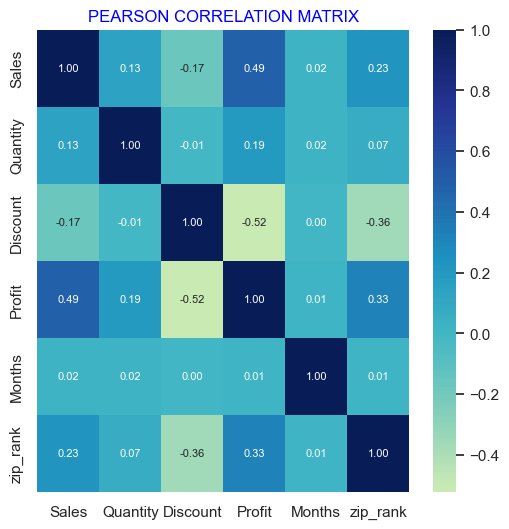

In [72]:
# find relations between two variables
plt.subplots(figsize=(6,6))
sns.heatmap(df.corr(), center=0, cmap="YlGnBu", annot=True, fmt='.2f', annot_kws={"size": 8})
plt.title('PEARSON CORRELATION MATRIX', fontsize=12)
plt.savefig('images/heatmap.png')
plt.show();

**Questions of interests:**
From correlation table, we get a sense of the most important features to the sales. We can see 'Discounts' becomes the MOST important contributor to profit.
 
 - 'Discount' has a bigger negative relationship with the 'Profit' and little relationship with 'quantity'.
 - 'Sale','Quantity' and 'sales_per_order' are positively correlated with 'Profit'.

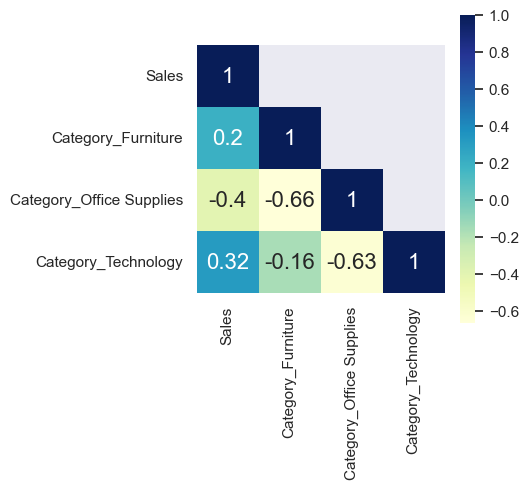

In [73]:
df1 = df[['Category','Sales']]
df_cat = pd.get_dummies(df1)
cor_mat = df_cat.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig = plt.gcf()
fig.set_size_inches(4,4)
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True, cmap="YlGnBu")
plt.show();

#### Scatter plots of numeric features against profit
Like heatmap, a pair plot and scatter plot are also used to observe linear relations between two variables in a dataset.

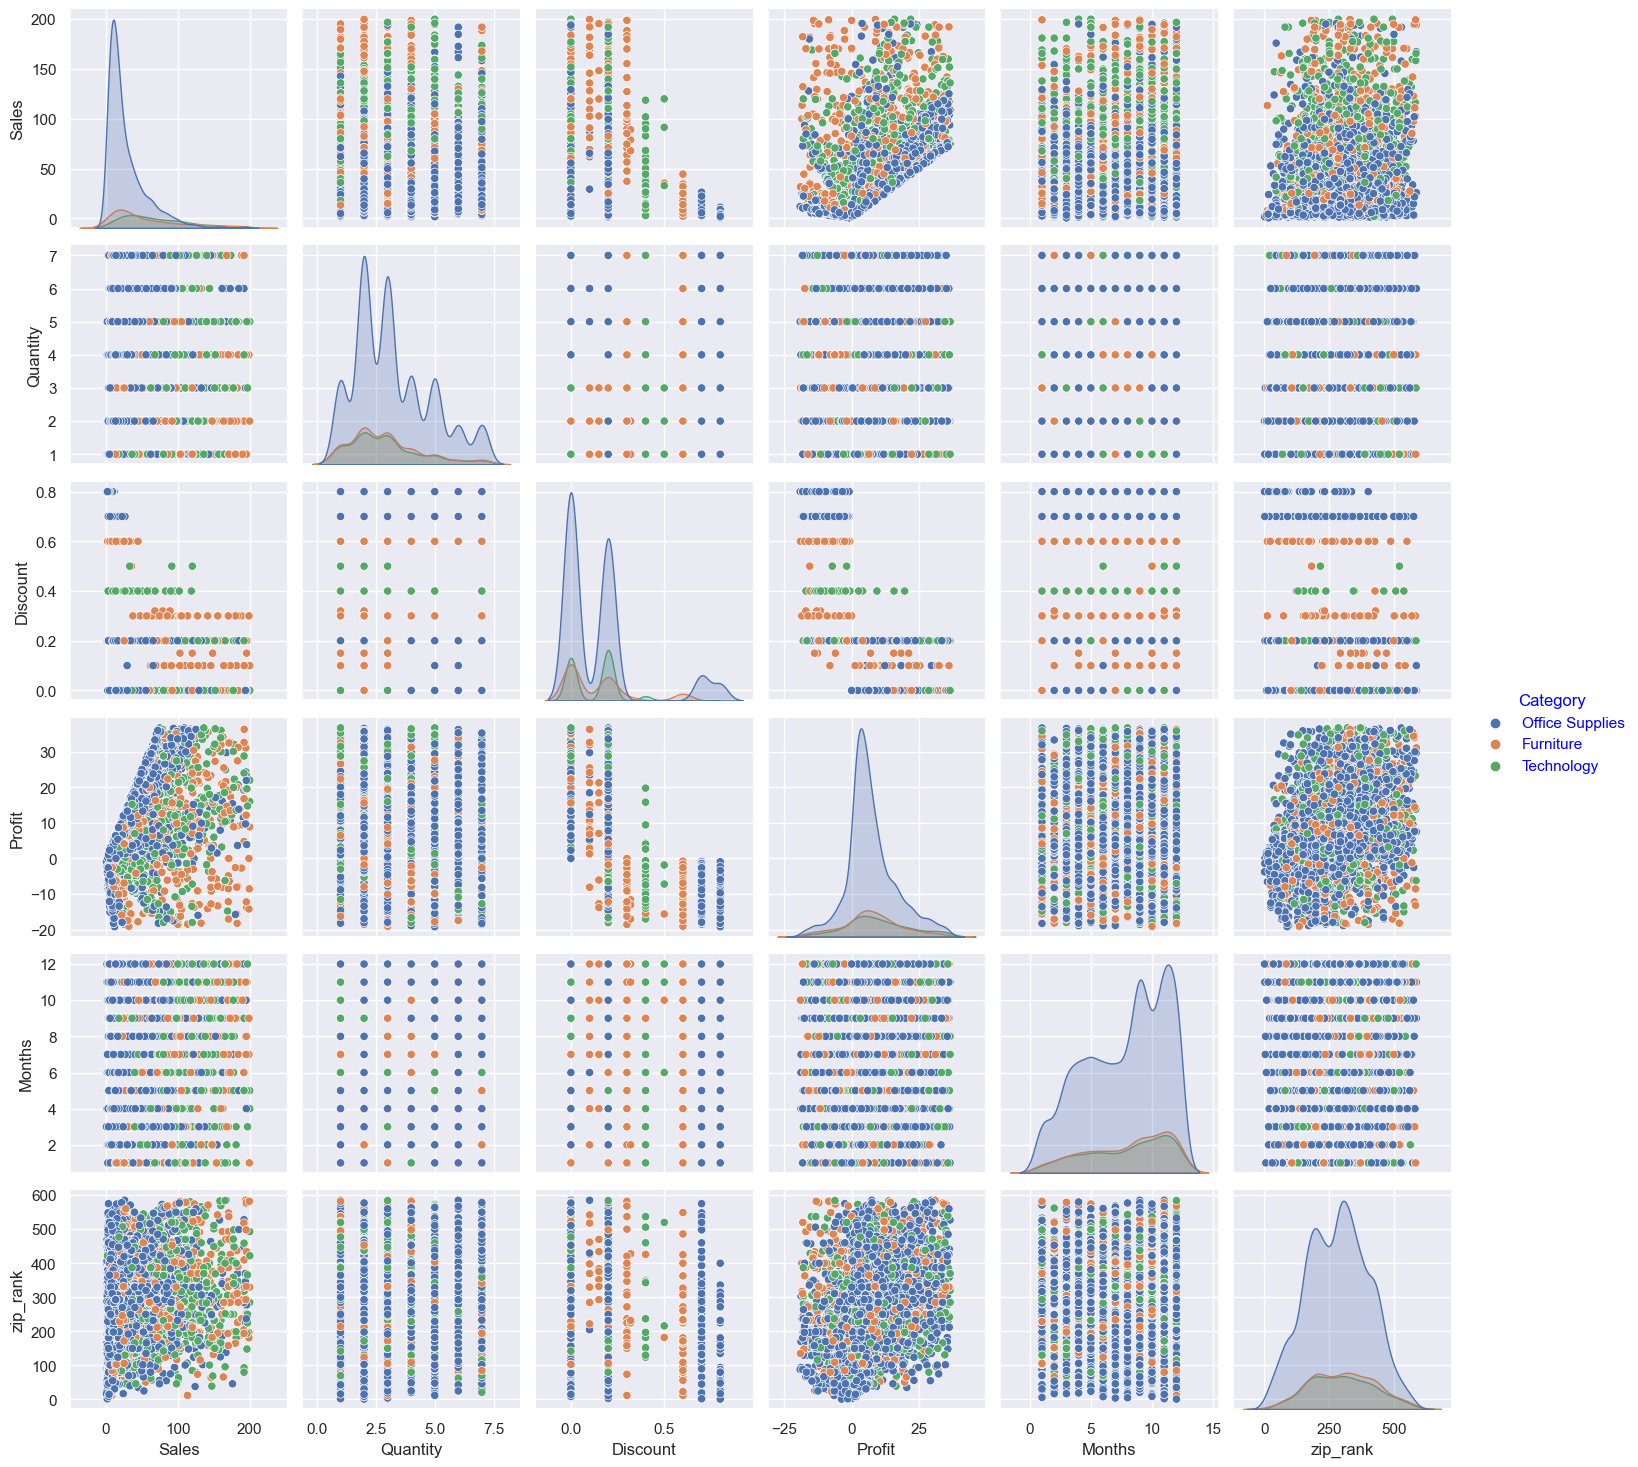

In [75]:
# pd.plotting.scatter_matrix(df_combined, figsize=(15, 15), s=150, marker='.')
sns.pairplot(df, hue='Category')
plt.show();
# we can see correlations between sales/profit, profit/discount, total sales/total population

## 5. Text analytics

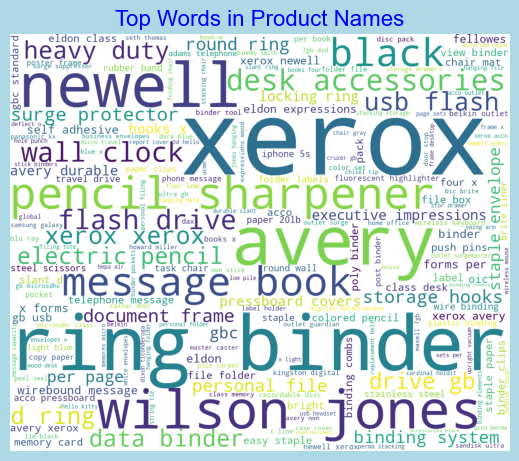

In [76]:
# use wordcloud to visualize which words are heavily involved in all the sales
product_names = ' '.join(df['Product Name'].str.lower().values)

from wordcloud import WordCloud , STOPWORDS
wordcloud = WordCloud(width=1200, height=1000, margin=0, background_color='white', stopwords=STOPWORDS, min_font_size = 10).generate(product_names)

# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = 'lightblue')
plt.imshow(wordcloud)
plt.title('Top Words in Product Names', fontsize=16)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('images/text_product.png')
plt.show();

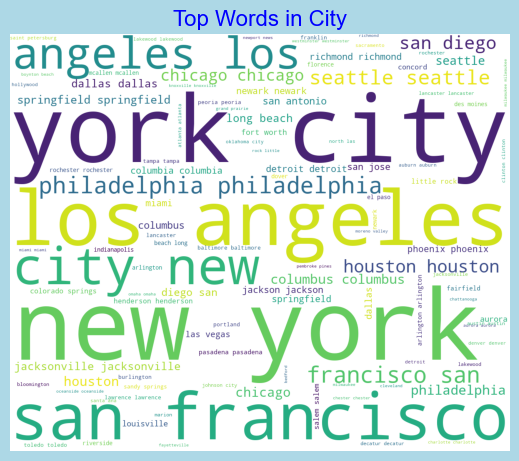

In [77]:
# use wordcloud to visualize which words are heavily involved in all the sales
product_names = ' '.join(df['City'].str.lower().values)

from wordcloud import WordCloud , STOPWORDS
wordcloud = WordCloud(width=1200, height=1000, margin=0, background_color='white', stopwords=STOPWORDS, min_font_size = 10).generate(product_names)

# plot the WordCloud image                      
plt.figure(figsize = (5, 5), facecolor = 'lightblue')
plt.imshow(wordcloud)
plt.title('Top Words in City', fontsize=16)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('images/text_city.png')
plt.show();

Through the wordcloud generated images, we can see:

 - **"xerox" and "ring binder"** are the two most important words that were repeatedly mentioned in the product names. This is not very surprising since we found out 'office supplies' has the largest volumes of orders. 
 - Two band names that stand out from this analysis are **"newell" and "wilson jones'**,  Newell Brands is an American worldwide manufacturer of consumer and commercial products with a portfolio of brands including: Rubbermaid storage, home organization and writing instruments, etc. Wilson Jones is the inventor and supplier of the three ring binder.
 - **'New York'** in the east region, **'Los Angles' and ' San Francisco'** in the west region are the top three most important cities. It makes sense because they are the cities with large amount of sales of products. 

## 6. Save data

In [78]:
df_clean = df.drop(['Order Date', 'Ship Date', 'Product Name', 'Order ID', 'Customer ID' ], axis=1)

In [79]:
df_clean.columns

Index(['ShipMode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Months',
       'zip_rank'],
      dtype='object')

In [80]:
print("The clean dataset has {} rows and {} columns.".format(df_clean.shape[0], df_clean.shape[1]))

The clean dataset has 6113 rows and 13 columns.


In [81]:
# save the state_summary separately.
datapath = './data'
save_file(df_clean, 'clean_data.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


## 7. Summary

Exploratory data analysis consists of analyzing the main characteristics of a data set usually by means of visualization methods and summary statistics.

In this notebook EDA includes:

- Check null/missing values
- Remove outliers
- Drop less useful columns
- Convert 'date and time' objects to the datetime data type

Feature engineering:
- add: months

Visualization:
- Break down the sales data, visualize the relations between the independent variables and the target variable